In [129]:
import sys
import numpy as np
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

In [3]:
df = pd.read_csv('merged-2.csv')

In [4]:
df

,Unnamed: 0,INTERVALSTARTTIME_GMT,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND,NR Cost ($/MWh),RD Cost ($/MWh),RU Cost ($/MWh),SR Cost ($/MWh),NR Amt (MWh),...,Day,Date,SNL Natural Gas NoCal Border Malin Spot Natural Gas Index (Price/Value),SNL Natural Gas NW Stanfield OR Spot Natural Gas Index (Price/Value),SNL Natural Gas NW Sumas Spot Natural Gas Index (Price/Value),SNL Natural Gas PG&E Gate Spot Natural Gas Index (Price/Value),SNL Natural Gas PG&E South Spot Natural Gas Index (Price/Value),SNL Natural Gas SoCal Border Spot Natural Gas Index (Price/Value),SNL Natural Gas SoCal Citygate Spot Natural Gas Index (Price/Value),SNL Natural Gas West Coast Sta 2 Spot Natural Gas Index (Price/Value)
0,0,2017-09-01T07:00:00-00:00,29.51582,29.65593,29.31310,0.0,0.0,0.0,0.0,315.00,...,1,9/1/2017,2.757,2.662,2.675,3.367,2.95,3.585,4.172,0.798
1,1,2017-09-01T08:00:00-00:00,31.86052,31.47178,31.26148,0.0,0.0,0.0,0.0,0.00,...,1,9/1/2017,2.757,2.662,2.675,3.367,2.95,3.585,4.172,0.798
2,2,2017-09-01T09:00:00-00:00,33.53806,33.08602,32.87506,0.0,0.0,0.0,0.0,2.47,...,1,9/1/2017,2.757,2.662,2.675,3.367,2.95,3.585,4.172,0.798
3,3,2017-09-01T10:00:00-00:00,38.22004,36.63521,36.65642,0.0,0.0,0.0,0.0,280.25,...,1,9/1/2017,2.757,2.662,2.675,3.367,2.95,3.585,4.172,0.798
4,4,2017-09-01T11:00:00-00:00,39.36980,31.02476,32.03865,0.0,0.0,0.0,0.0,0.00,...,1,9/1/2017,2.757,2.662,2.675,3.367,2.95,3.585,4.172,0.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,26724,2020-11-30T02:00:00-00:00,38.25127,34.80821,35.55976,0.0,0.0,0.0,0.0,44.39,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26725,26725,2020-11-30T03:00:00-00:00,38.81644,34.27173,36.91697,0.0,0.0,0.0,0.0,31.89,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26726,26726,2020-11-30T04:00:00-00:00,43.80097,39.65510,40.88294,0.0,0.0,0.0,0.0,31.89,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26727,26727,2020-11-30T05:00:00-00:00,49.32896,44.88878,45.85798,0.0,0.0,0.0,0.0,31.89,...,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
y_np15 = df['TH_NP15_GEN-APND']
y_sp15 = df['TH_SP15_GEN-APND']
y_zp26 = df['TH_ZP26_GEN-APND']

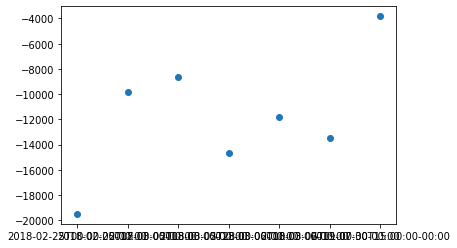

In [7]:
plt.scatter(df['INTERVALSTARTTIME_GMT'].loc[df['NR Cost ($/MWh)']!=0], df['NR Cost ($/MWh)'].loc[df['NR Cost ($/MWh)']!=0])
plt.show()

#There appear to be no significant values for NR, RD, RU, & SR Costs

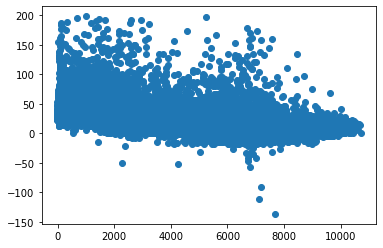

In [14]:
plt.scatter(df['SP15 Renewables (MW)'].loc[df['TH_SP15_GEN-APND']<200], y_sp15.loc[df['TH_SP15_GEN-APND']<200])
plt.show()

#Apparent Trend

In [132]:
hour_dummies = pd.get_dummies(df['OPR_HR'])
date_dummies = pd.get_dummies(df['Month'])
hour_dummies = hour_dummies.rename(columns = {1:'hr1',2:'hr2',3:'hr3',4:'hr4',5:'hr5',6:'hr6',7:'hr7',8:'hr8',
                              9:'hr9',10:'hr10',11:'hr11',12:'hr12',13:'hr13',14:'hr14',15:'hr15',16:'hr16',
                              17:'hr17',18:'hr18',19:'hr19',20:'hr20',21:'hr21',22:'hr22',23:'hr23',24:'hr24',})
date_dummies = date_dummies.rename(columns = {1:'mnth1',2:'mnth2',3:'mnth3',4:'mnth4',5:'mnth5',6:'mnth6',7:'mnth7',8:'mnth8',
                               9:'mnth9',10:'mnth10',11:'mnth11',12:'mnth12',})
merge = pd.merge(df, hour_dummies, left_index = True, right_index = True)
merge = pd.merge(merge, date_dummies, left_index = True, right_index = True)
merge = merge.drop(['Unnamed: 0','NR Cost ($/MWh)','RD Cost ($/MWh)','RU Cost ($/MWh)','SR Cost ($/MWh)'], axis = 1)
merge

,INTERVALSTARTTIME_GMT,TH_NP15_GEN-APND,TH_SP15_GEN-APND,TH_ZP26_GEN-APND,NR Amt (MWh),RD Amt (MWh),RU Amt (MWh),SR Amt (MWh),CAISO Actual PV Generation,NP15 Renewables (MW),...,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11,mnth12
0,2017-09-01T07:00:00-00:00,29.51582,29.65593,29.31310,315.00,0.00,0.00,-2.86,-30.80463,-0.33494,...,0,0,0,0,0,0,1,0,0,0
1,2017-09-01T08:00:00-00:00,31.86052,31.47178,31.26148,0.00,0.00,0.00,-8.20,-30.74472,-4.38135,...,0,0,0,0,0,0,1,0,0,0
2,2017-09-01T09:00:00-00:00,33.53806,33.08602,32.87506,2.47,0.00,0.00,4.11,-30.21999,-6.88589,...,0,0,0,0,0,0,1,0,0,0
3,2017-09-01T10:00:00-00:00,38.22004,36.63521,36.65642,280.25,0.00,0.00,-60.01,-31.63246,-7.54629,...,0,0,0,0,0,0,1,0,0,0
4,2017-09-01T11:00:00-00:00,39.36980,31.02476,32.03865,0.00,0.00,0.00,-69.98,-33.08414,28.72493,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26724,2020-11-30T02:00:00-00:00,38.25127,34.80821,35.55976,44.39,0.00,0.19,43.71,-36.68850,15.99573,...,0,0,0,0,0,0,0,0,1,0
26725,2020-11-30T03:00:00-00:00,38.81644,34.27173,36.91697,31.89,0.11,31.42,0.70,-35.84548,10.86688,...,0,0,0,0,0,0,0,0,1,0
26726,2020-11-30T04:00:00-00:00,43.80097,39.65510,40.88294,31.89,0.00,10.58,21.08,-35.77169,3.95279,...,0,0,0,0,0,0,0,0,1,0
26727,2020-11-30T05:00:00-00:00,49.32896,44.88878,45.85798,31.89,0.00,10.81,21.08,-35.28967,6.96283,...,0,0,0,0,0,0,0,0,1,0


In [102]:
merge_17 = merge[(pd.to_datetime(merge['INTERVALSTARTTIME_GMT']) < pd.to_datetime('2018-01-01 00:00:00+00:00'))]
merge_18 = merge[(pd.to_datetime(merge['INTERVALSTARTTIME_GMT']) < pd.to_datetime('2019-01-01 00:00:00+00:00'))
                 & (pd.to_datetime(merge['INTERVALSTARTTIME_GMT']) >= pd.to_datetime('2018-01-01 00:00:00+00:00'))]
merge_19 = merge[(pd.to_datetime(merge['INTERVALSTARTTIME_GMT']) < pd.to_datetime('2020-01-01 00:00:00+00:00'))
                 & (pd.to_datetime(merge['INTERVALSTARTTIME_GMT']) >= pd.to_datetime('2019-01-01 00:00:00+00:00'))]
merge_20 = merge[(pd.to_datetime(merge['INTERVALSTARTTIME_GMT']) >= pd.to_datetime('2020-01-01 00:00:00+00:00'))]

In [103]:
merge.to_csv('merge.csv')
merge_17.to_csv('merge_17.csv')
merge_18.to_csv('merge_18.csv')
merge_19.to_csv('merge_19.csv')
merge_20.to_csv('merge_20.csv')

In [135]:
y = merge['TH_NP15_GEN-APND']
X = merge.drop(columns = ['TH_NP15_GEN-APND','INTERVALSTARTTIME_GMT','TH_SP15_GEN-APND','TH_ZP26_GEN-APND','SP15 Renewables (MW)','ZP26 Renewables (MW)','OPR_DT','OPR_HR','Systemwide Load Forecast','Systemwide PV Forecast','Month','Day','Date','SNL Natural Gas NoCal Border Malin Spot Natural Gas Index (Price/Value)','SNL Natural Gas NW Stanfield OR Spot Natural Gas Index (Price/Value)','SNL Natural Gas NW Sumas Spot Natural Gas Index (Price/Value)','SNL Natural Gas PG&E Gate Spot Natural Gas Index (Price/Value)','SNL Natural Gas PG&E South Spot Natural Gas Index (Price/Value)','SNL Natural Gas SoCal Border Spot Natural Gas Index (Price/Value)','SNL Natural Gas SoCal Citygate Spot Natural Gas Index (Price/Value)','SNL Natural Gas West Coast Sta 2 Spot Natural Gas Index (Price/Value)'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lasso = Lasso(alpha=1)
lasso.fit(X_train, y_train)
lasso_coefficients = lasso.coef_
print(lasso_coefficients)

       NR Amt (MWh)  RD Amt (MWh)  RU Amt (MWh)  SR Amt (MWh)  \
0          5.752573          -inf          -inf           NaN   
1              -inf          -inf          -inf           NaN   
2          0.904218          -inf          -inf      1.413423   
3          5.635682          -inf          -inf           NaN   
4              -inf          -inf          -inf           NaN   
...             ...           ...           ...           ...   
26724      3.793014          -inf     -1.660731      3.777577   
26725      3.462292     -2.207275      3.447445     -0.356675   
26726      3.462292          -inf      2.358965      3.048325   
26727      3.462292          -inf      2.380472      3.048325   
26728          -inf          -inf      0.570980           NaN   

       CAISO Actual PV Generation  NP15 Renewables (MW)  \
0                             NaN                   NaN   
1                             NaN                   NaN   
2                             NaN         

<ipython-input-135-781cc79eec59>:3: RuntimeWarning: divide by zero encountered in log
  X = np.log(X)
<ipython-input-135-781cc79eec59>:3: RuntimeWarning: invalid value encountered in log
  X = np.log(X)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').